<a href="https://colab.research.google.com/github/jsten07/cms_routing/blob/main/firstCalculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
from skimage.graph import route_through_array
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os
import random
from datetime import datetime, timedelta
import math

In [2]:
#create some example values

# create example Grids wit 100*100
N = 100
timeGrid= [[random.random() for i in range(N)] for j in range(N)]
startpoint=(1,10)
endpoint= (90,99)
startTime="15:00"
endTime="18:00"

In [3]:
#create Route
route, weight = route_through_array(timeGrid, startpoint, endpoint, fully_connected=False, geometric=True)
route

[(1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (2, 13),
 (2, 14),
 (3, 14),
 (3, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (3, 20),
 (4, 20),
 (5, 20),
 (6, 20),
 (6, 21),
 (6, 22),
 (6, 23),
 (7, 23),
 (8, 23),
 (9, 23),
 (9, 24),
 (10, 24),
 (10, 25),
 (11, 25),
 (12, 25),
 (13, 25),
 (13, 26),
 (13, 27),
 (13, 28),
 (14, 28),
 (14, 29),
 (14, 30),
 (15, 30),
 (15, 31),
 (15, 32),
 (15, 33),
 (16, 33),
 (17, 33),
 (18, 33),
 (19, 33),
 (20, 33),
 (21, 33),
 (22, 33),
 (23, 33),
 (24, 33),
 (24, 34),
 (25, 34),
 (26, 34),
 (26, 35),
 (26, 36),
 (27, 36),
 (27, 37),
 (27, 38),
 (28, 38),
 (29, 38),
 (29, 39),
 (29, 40),
 (29, 41),
 (29, 42),
 (29, 43),
 (30, 43),
 (31, 43),
 (31, 44),
 (31, 45),
 (31, 46),
 (32, 46),
 (33, 46),
 (33, 47),
 (33, 48),
 (34, 48),
 (34, 49),
 (34, 50),
 (34, 51),
 (34, 52),
 (33, 52),
 (33, 53),
 (33, 54),
 (33, 55),
 (32, 55),
 (32, 56),
 (31, 56),
 (31, 57),
 (31, 58),
 (31, 59),
 (32, 59),
 (33, 59),
 (33, 60),
 (33, 61),
 (34, 61),
 (34, 62),
 (35, 62),


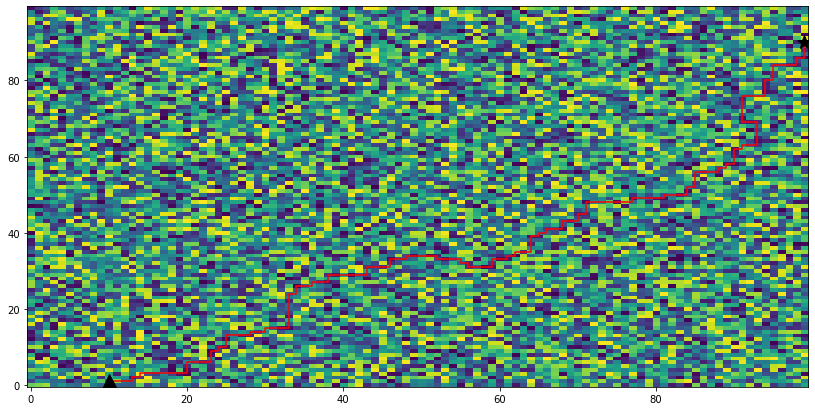

In [4]:
#plot route
routeDisplay=   np.stack(route, axis=-1)
plt.figure(figsize=(14,7))
# Costs
plt.imshow(timeGrid, aspect='auto', vmin=np.min(timeGrid), vmax=np.max(timeGrid));
# Route
plt.plot(routeDisplay[1],routeDisplay[0], 'r')
# Start/end points
plt.plot(startpoint[1], startpoint[0], 'k^', markersize=15)
plt.plot(endpoint[1], endpoint[0], 'k*', markersize=15)
plt.gca().invert_yaxis();

In [5]:
def makeArrays(route):
    routeNew = []
    for x in route:
      routeNew.append(list(x))
    return routeNew

In [6]:
route = makeArrays(route)
route

[[1, 10],
 [1, 11],
 [1, 12],
 [1, 13],
 [2, 13],
 [2, 14],
 [3, 14],
 [3, 15],
 [3, 16],
 [3, 17],
 [3, 18],
 [3, 19],
 [3, 20],
 [4, 20],
 [5, 20],
 [6, 20],
 [6, 21],
 [6, 22],
 [6, 23],
 [7, 23],
 [8, 23],
 [9, 23],
 [9, 24],
 [10, 24],
 [10, 25],
 [11, 25],
 [12, 25],
 [13, 25],
 [13, 26],
 [13, 27],
 [13, 28],
 [14, 28],
 [14, 29],
 [14, 30],
 [15, 30],
 [15, 31],
 [15, 32],
 [15, 33],
 [16, 33],
 [17, 33],
 [18, 33],
 [19, 33],
 [20, 33],
 [21, 33],
 [22, 33],
 [23, 33],
 [24, 33],
 [24, 34],
 [25, 34],
 [26, 34],
 [26, 35],
 [26, 36],
 [27, 36],
 [27, 37],
 [27, 38],
 [28, 38],
 [29, 38],
 [29, 39],
 [29, 40],
 [29, 41],
 [29, 42],
 [29, 43],
 [30, 43],
 [31, 43],
 [31, 44],
 [31, 45],
 [31, 46],
 [32, 46],
 [33, 46],
 [33, 47],
 [33, 48],
 [34, 48],
 [34, 49],
 [34, 50],
 [34, 51],
 [34, 52],
 [33, 52],
 [33, 53],
 [33, 54],
 [33, 55],
 [32, 55],
 [32, 56],
 [31, 56],
 [31, 57],
 [31, 58],
 [31, 59],
 [32, 59],
 [33, 59],
 [33, 60],
 [33, 61],
 [34, 61],
 [34, 62],
 [35, 62],


In [7]:
def calculateTime(route, startTime, endTime):
    sumTime = 0
    for x in route:
      sumTime = sumTime + timeGrid[x[0]][x[1]]
    startTime_object = datetime.strptime(startTime, "%H:%M" )
    endTime_object = datetime.strptime(endTime, "%H:%M" )
    minutes_added = timedelta(minutes  = sumTime)
    eta = startTime_object + minutes_added
    difference= endTime_object-eta
    total_seconds = difference.total_seconds()
    minutes = total_seconds/60
    return minutes


In [8]:
difference= calculateTime(route, startTime, endTime)
difference

129.96701716666666

In [9]:
def calculateBearing(route):
    for i in range(len(route)-1):
        if route[i][0]< route[i+1][0]:
            route[i].append("up")
        elif route[i][0] > route[i+1][0]:
            route[i].append("down")
        elif route[i][1] < route[i+1][1]:
            route[i].append("right")
        elif route[i][1] > route[i+1][1]:
            route[i].append("left")
        else:
             route[i].append("error")

In [10]:
calculateBearing(route)


In [11]:
route

[[1, 10, 'right'],
 [1, 11, 'right'],
 [1, 12, 'right'],
 [1, 13, 'up'],
 [2, 13, 'right'],
 [2, 14, 'up'],
 [3, 14, 'right'],
 [3, 15, 'right'],
 [3, 16, 'right'],
 [3, 17, 'right'],
 [3, 18, 'right'],
 [3, 19, 'right'],
 [3, 20, 'up'],
 [4, 20, 'up'],
 [5, 20, 'up'],
 [6, 20, 'right'],
 [6, 21, 'right'],
 [6, 22, 'right'],
 [6, 23, 'up'],
 [7, 23, 'up'],
 [8, 23, 'up'],
 [9, 23, 'right'],
 [9, 24, 'up'],
 [10, 24, 'right'],
 [10, 25, 'up'],
 [11, 25, 'up'],
 [12, 25, 'up'],
 [13, 25, 'right'],
 [13, 26, 'right'],
 [13, 27, 'right'],
 [13, 28, 'up'],
 [14, 28, 'right'],
 [14, 29, 'right'],
 [14, 30, 'up'],
 [15, 30, 'right'],
 [15, 31, 'right'],
 [15, 32, 'right'],
 [15, 33, 'up'],
 [16, 33, 'up'],
 [17, 33, 'up'],
 [18, 33, 'up'],
 [19, 33, 'up'],
 [20, 33, 'up'],
 [21, 33, 'up'],
 [22, 33, 'up'],
 [23, 33, 'up'],
 [24, 33, 'right'],
 [24, 34, 'up'],
 [25, 34, 'up'],
 [26, 34, 'right'],
 [26, 35, 'right'],
 [26, 36, 'up'],
 [27, 36, 'right'],
 [27, 37, 'right'],
 [27, 38, 'up'],
 [28

In [12]:
def manipulate(route):
  randomNumber = random.random()*len(route)
  startIndex= math.floor(randomNumber)
  startpoint = route[startIndex]
  endIndex= math.floor(startIndex + (random.random() * (len(route)-startIndex)))
  endpoint= route[endIndex]
  newGrid= [[random.random() for i in range(N)] for j in range(N)]
  manipulateRoute, weight = route_through_array(newGrid, startpoint[0:2], endpoint[0:2], fully_connected=False, geometric=True)
  manipulateRoute = makeArrays(manipulateRoute)
  manipulatedRoute = []
  for i in range(startIndex):
            manipulatedRoute.append(route[i])
  for x in manipulateRoute:
    manipulatedRoute.append(x)
  for i in range((endIndex+1),len(route)):
            manipulatedRoute.append(route[i])
  return manipulatedRoute




In [13]:
manipulatedRoute = manipulate(route)
manipulatedRoute

[[1, 10, 'right'],
 [1, 11, 'right'],
 [1, 12, 'right'],
 [1, 13, 'up'],
 [2, 13, 'right'],
 [2, 14, 'up'],
 [3, 14, 'right'],
 [3, 15, 'right'],
 [3, 16, 'right'],
 [3, 17, 'right'],
 [3, 18, 'right'],
 [3, 19, 'right'],
 [3, 20, 'up'],
 [4, 20, 'up'],
 [5, 20, 'up'],
 [6, 20, 'right'],
 [6, 21, 'right'],
 [6, 22, 'right'],
 [6, 23, 'up'],
 [7, 23, 'up'],
 [8, 23, 'up'],
 [9, 23, 'right'],
 [9, 24, 'up'],
 [10, 24, 'right'],
 [10, 25, 'up'],
 [11, 25, 'up'],
 [12, 25, 'up'],
 [13, 25, 'right'],
 [13, 26, 'right'],
 [13, 27, 'right'],
 [13, 28, 'up'],
 [14, 28, 'right'],
 [14, 29, 'right'],
 [14, 30, 'up'],
 [15, 30, 'right'],
 [15, 31, 'right'],
 [15, 32, 'right'],
 [15, 33, 'up'],
 [16, 33, 'up'],
 [17, 33, 'up'],
 [18, 33, 'up'],
 [19, 33, 'up'],
 [20, 33, 'up'],
 [21, 33, 'up'],
 [22, 33, 'up'],
 [23, 33, 'up'],
 [24, 33, 'right'],
 [24, 34, 'up'],
 [25, 34, 'up'],
 [26, 34, 'right'],
 [26, 35, 'right'],
 [26, 36, 'up'],
 [27, 36, 'right'],
 [27, 37, 'right'],
 [27, 38, 'up'],
 [28

In [14]:
def removeBearingForDisplay(route):
  newRoute= []
  for x in route:
      newRoute.append(x[0:2])
  return newRoute

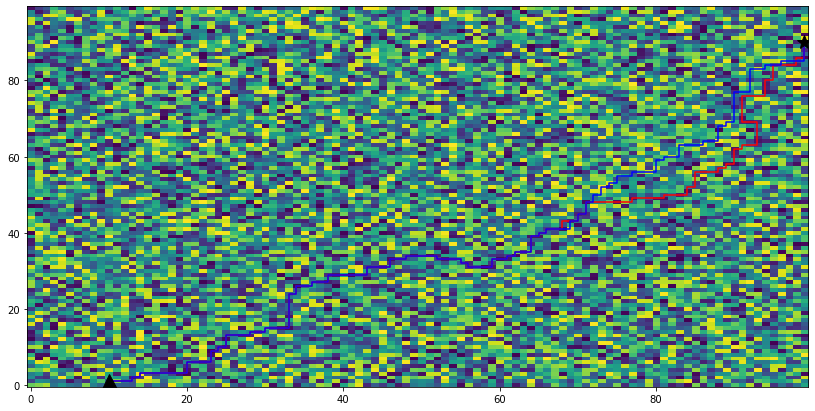

In [15]:
routeDisplay= removeBearingForDisplay(route)
routeDisplay=  np.stack(routeDisplay, axis=-1)
manipulateRouteDisplay= removeBearingForDisplay(manipulatedRoute)
manipulateRouteDisplay= np.stack(manipulateRouteDisplay, axis=-1)
plt.figure(figsize=(14,7))
# Costs
plt.imshow(timeGrid, aspect='auto', vmin=np.min(timeGrid), vmax=np.max(timeGrid));
# Route
plt.plot(routeDisplay[1],routeDisplay[0], 'r')
plt.plot(manipulateRouteDisplay[1],manipulateRouteDisplay[0], 'b')
# Start/end points
plt.plot(startpoint[1], startpoint[0], 'k^', markersize=15)
plt.plot(endpoint[1], endpoint[0], 'k*', markersize=15)
plt.gca().invert_yaxis();

In [16]:
def closest_node(node, nodes):
    nodes = np.asarray(nodes)
    dist_2 = np.sum((nodes - node)**2, axis=1)
    return np.argmin(dist_2)

In [17]:
def crossover(route1, route2):
  randomNumber = math.floor(random.random()*len(route))
  crossoverPoint1 = route1[randomNumber]
  index= closest_node(crossoverPoint1, route2)
  crossoverPoint2 = route2[index]
  print(index, crossoverPoint1, crossoverPoint2)
  newGrid= [[random.random() for i in range(N)] for j in range(N)]
  crossoverRoute, weight = route_through_array(newGrid, crossoverPoint1[0:2], crossoverPoint2[0:2], fully_connected=False, geometric=True)
  child1= []
  child2= []
  print(route1[0:randomNumber], crossoverRoute, route2[index:len(route2)])
  print(route2[0:index], crossoverRoute, route1[randomNumber:len(route1)])
  for i in range(randomNumber):
    child1.append(route1[i])
  for i in range(index):
    child2.append(route2[i])
  for x in crossoverRoute:
    child1.append(x)
  for i in range(len(crossoverRoute) -1, 0, -1):
    print(i)
    child2.append(crossoverRoute[i])
  for i in range(index +1,len(route2)):
    child1.append(route2[i])
  for i in range(randomNumber,len(route1)):
    child2.append(route1[i])
  return[child1, child2, crossoverRoute]



In [18]:
newGrid= [[random.random() for i in range(N)] for j in range(N)]
route2, weight = route_through_array(newGrid, startpoint, endpoint, fully_connected=False, geometric=True)


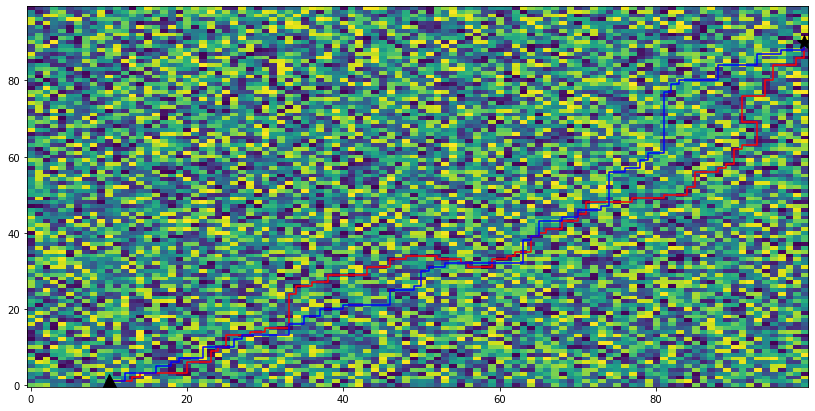

In [19]:
routeDisplay= removeBearingForDisplay(route)
routeDisplay=  np.stack(routeDisplay, axis=-1)
route2Display= removeBearingForDisplay(route2)
route2Display= np.stack(route2Display, axis=-1)
plt.figure(figsize=(14,7))
# Costs
plt.imshow(timeGrid, aspect='auto', vmin=np.min(timeGrid), vmax=np.max(timeGrid));
# Route
plt.plot(routeDisplay[1],routeDisplay[0], 'r')
plt.plot(route2Display[1],route2Display[0], 'b')
# Start/end points
plt.plot(startpoint[1], startpoint[0], 'k^', markersize=15)
plt.plot(endpoint[1], endpoint[0], 'k*', markersize=15)
plt.gca().invert_yaxis();

In [20]:
route1 = removeBearingForDisplay(route)
route2 = removeBearingForDisplay(route2)
childs=crossover(route1, route2)

157 [73, 91] (80, 88)
[[1, 10], [1, 11], [1, 12], [1, 13], [2, 13], [2, 14], [3, 14], [3, 15], [3, 16], [3, 17], [3, 18], [3, 19], [3, 20], [4, 20], [5, 20], [6, 20], [6, 21], [6, 22], [6, 23], [7, 23], [8, 23], [9, 23], [9, 24], [10, 24], [10, 25], [11, 25], [12, 25], [13, 25], [13, 26], [13, 27], [13, 28], [14, 28], [14, 29], [14, 30], [15, 30], [15, 31], [15, 32], [15, 33], [16, 33], [17, 33], [18, 33], [19, 33], [20, 33], [21, 33], [22, 33], [23, 33], [24, 33], [24, 34], [25, 34], [26, 34], [26, 35], [26, 36], [27, 36], [27, 37], [27, 38], [28, 38], [29, 38], [29, 39], [29, 40], [29, 41], [29, 42], [29, 43], [30, 43], [31, 43], [31, 44], [31, 45], [31, 46], [32, 46], [33, 46], [33, 47], [33, 48], [34, 48], [34, 49], [34, 50], [34, 51], [34, 52], [33, 52], [33, 53], [33, 54], [33, 55], [32, 55], [32, 56], [31, 56], [31, 57], [31, 58], [31, 59], [32, 59], [33, 59], [33, 60], [33, 61], [34, 61], [34, 62], [35, 62], [35, 63], [35, 64], [36, 64], [37, 64], [38, 64], [39, 64], [39, 65], 

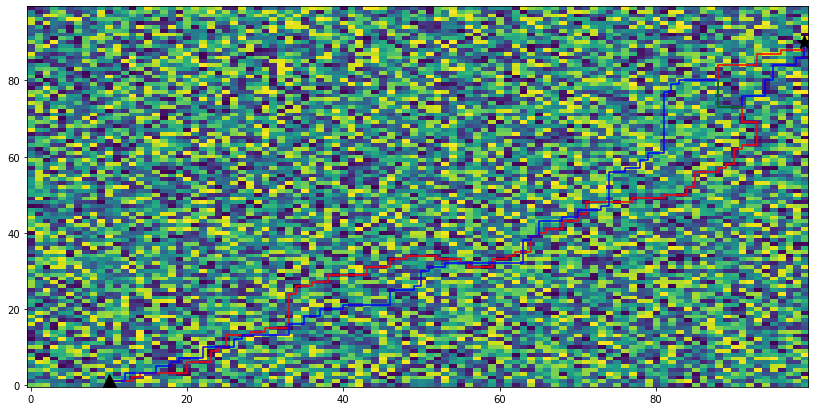

In [21]:
child1Display= removeBearingForDisplay(childs[0])
child1Display=  np.stack(child1Display, axis=-1)
child2Display= removeBearingForDisplay(childs[1])
child2Display= np.stack(child2Display, axis=-1)

crossoverDisplay= np.stack(childs[2], axis=-1)
plt.figure(figsize=(14,7))
# Costs
plt.imshow(timeGrid, aspect='auto', vmin=np.min(timeGrid), vmax=np.max(timeGrid));
# Route
plt.plot(child1Display[1],child1Display[0], 'r')
plt.plot(child2Display[1],child2Display[0], 'b')
plt.plot(crossoverDisplay[1],crossoverDisplay[0], 'g')
# Start/end points
plt.plot(startpoint[1], startpoint[0], 'k^', markersize=15)
plt.plot(endpoint[1], endpoint[0], 'k*', markersize=15)
plt.gca().invert_yaxis();

In [22]:
def findDuplicate(node, nodes, index):
    nodes= nodes[index: len(nodes)]
    nodes = np.asarray(nodes)
    dist_2 = np.sum((nodes - node)**2, axis=1)
    return np.where(dist_2 == 0)

In [23]:
def eleminateDuplicates(route):
    for i in range(0, len(route)):
      duplicate=findDuplicate(route[i],route, i)
      duplicate=duplicate[0]
      if len(duplicate) > 1:
        print(duplicate[0], duplicate[1])
        newArray= route[:i] + route[i+duplicate[1]:]
        return newArray
    return route


In [24]:
child1= eleminateDuplicates(childs[0])
child2= eleminateDuplicates(childs[1])

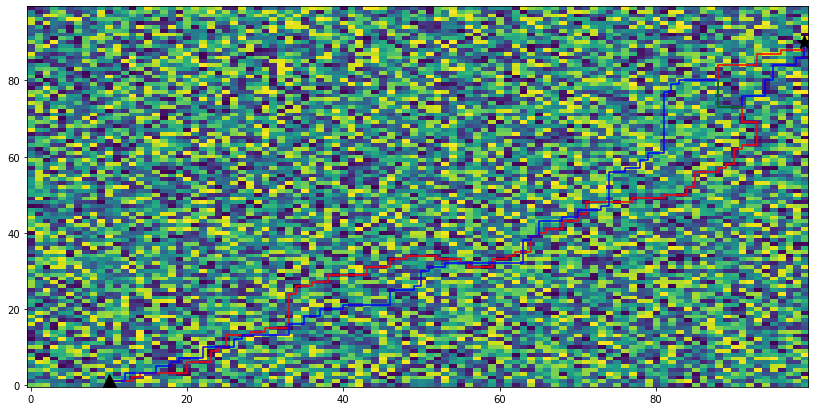

In [25]:
child1Display= removeBearingForDisplay(child1)
child1Display=  np.stack(child1Display, axis=-1)
child2Display= removeBearingForDisplay(child2)
child2Display= np.stack(child2Display, axis=-1)

crossoverDisplay= np.stack(childs[2], axis=-1)
plt.figure(figsize=(14,7))
# Costs
plt.imshow(timeGrid, aspect='auto', vmin=np.min(timeGrid), vmax=np.max(timeGrid));
# Route
plt.plot(child1Display[1],child1Display[0], 'r')
plt.plot(child2Display[1],child2Display[0], 'b')
plt.plot(crossoverDisplay[1],crossoverDisplay[0], 'g')
# Start/end points
plt.plot(startpoint[1], startpoint[0], 'k^', markersize=15)
plt.plot(endpoint[1], endpoint[0], 'k*', markersize=15)
plt.gca().invert_yaxis();

In [26]:
findDuplicate([1,10], childs[1], 0)

(array([0]),)

In [27]:
def mutation(crossover_child):
    mutation_subset = crossover_child[5:-5]
    for i in mutation_subset:
        i = list(i)
        i[0] += random.randint(0, 2)
        i[1] += random.randint(0, 2)
        i =set(i)
    
    return crossover_child[:5] + mutation_subset +crossover_child[-5:]

In [28]:
mutation(child1)

[[1, 10],
 [1, 11],
 [1, 12],
 [1, 13],
 [2, 13],
 [2, 14],
 [3, 14],
 [3, 15],
 [3, 16],
 [3, 17],
 [3, 18],
 [3, 19],
 [3, 20],
 [4, 20],
 [5, 20],
 [6, 20],
 [6, 21],
 [6, 22],
 [6, 23],
 [7, 23],
 [8, 23],
 [9, 23],
 [9, 24],
 [10, 24],
 [10, 25],
 [11, 25],
 [12, 25],
 [13, 25],
 [13, 26],
 [13, 27],
 [13, 28],
 [14, 28],
 [14, 29],
 [14, 30],
 [15, 30],
 [15, 31],
 [15, 32],
 [15, 33],
 [16, 33],
 [17, 33],
 [18, 33],
 [19, 33],
 [20, 33],
 [21, 33],
 [22, 33],
 [23, 33],
 [24, 33],
 [24, 34],
 [25, 34],
 [26, 34],
 [26, 35],
 [26, 36],
 [27, 36],
 [27, 37],
 [27, 38],
 [28, 38],
 [29, 38],
 [29, 39],
 [29, 40],
 [29, 41],
 [29, 42],
 [29, 43],
 [30, 43],
 [31, 43],
 [31, 44],
 [31, 45],
 [31, 46],
 [32, 46],
 [33, 46],
 [33, 47],
 [33, 48],
 [34, 48],
 [34, 49],
 [34, 50],
 [34, 51],
 [34, 52],
 [33, 52],
 [33, 53],
 [33, 54],
 [33, 55],
 [32, 55],
 [32, 56],
 [31, 56],
 [31, 57],
 [31, 58],
 [31, 59],
 [32, 59],
 [33, 59],
 [33, 60],
 [33, 61],
 [34, 61],
 [34, 62],
 [35, 62],
